Churn Detection using Cell2Cell Dataset

 
### Summary 
This is exploratory data analysis project for cell2cell data set available on kaggel. 
in this project, I tried to answer few question regarding dataset and customer pattern for churn
I have asked 7 basic questions and tried to get answer to those question using data sceience

- Is it balance dataset for machine learning
- What is revenue distribution , are we losing high value customer ? 
- Are we loosing existing customer or new customer
- What about subscribers, can we use this to predict subscriber churn
- How effective is retention measures.
- What is sucess rate of retention offers
- Are any specific income group customers are losing ? 
- Is there any pattern in credit class of a customer 

Then I will do data preprocessing and finaly use machine learning to predict customer churn

[Blog post](https://medium.com/@odmirajkar/analyzing-customer-churn-in-telecom-f928c8119244) explain the interpretiation of results in this notebook.

### Business Need
Whenever customer cancel its subscription its called as churn. Customer churn is biggest problem in telecom industry, as telecom density has already reach to saturation point. So getting new customer is getting difficult. At a same time customers are opting for substitute products like OTT over dish or cable TV, Internet call over regular telephone.
So since adding new customer is difficult and existing customer are switching towards substitute products . This makes retaining existing customer at most important.


### Data set used and its properties
For this analysis, I am using Cell2Cell dataset from Kaggle. This is open source data(cell2cell) by Teradata center for customer relationship management at Duke University. Cell2Cell dataset is preprocessed and a balanced version provided for analyzing Process. consists of 51,047 instances and 58 attributes.

In [1]:
#Do all imports
import pandas as pd
from matplotlib import pyplot as plt
import datavisualize as visual

Load data from csv file to pandas dataframe

In [2]:
df=pd.read_csv('cell2celltrain.csv')

Lets check how many customer data we have

In [3]:
print("No of customers ".format(df.shape[0]))
print("No of attrbutes for each customers ".format(df.shape[1]))

No of customers 
No of attrbutes for each customers 


In [4]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [5]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


### Exploratory data Analysis

Divide data set into two data set for churn and non churn customers, for further analysis 

In [7]:

churn_df=df[df['Churn']=='Yes']
non_churn_df= df[df['Churn']=='No']

In [8]:
churned= df[df['Churn']=='Yes'].shape[0]

In [9]:
notchurned= df[df['Churn']=='No'].shape[0]

In [10]:
print("Total Churned customer {} ".format(churned))

Total Churned customer 14711 


In [11]:
#Dataset has any missing data with churn indicator ? 
df['Churn'].isna().sum()

0

In [12]:
plt.style.use("fivethirtyeight")

### Q1 - Is data set balanced ? 
how many churn customer we have vs non churn customer

In [13]:
slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]


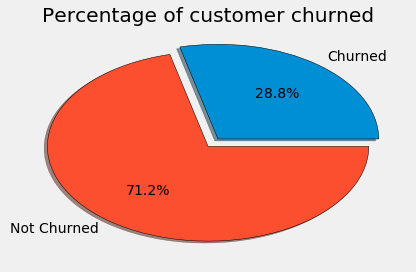

In [14]:
#plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
#plt.title("Percentage of customer churned")

#plt.tight_layout()
#plt.show()
visual.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',title="Percentage of customer churned")

#### Q2 - what is revenue distribution , are we losing high value customer ? 
Can we plot histogram for each revenue group how many customers are churn vs non churn

Logic for ansawering this 
1. fill missing values with mean of monthly revenue 
2. Since there is possibility that churn customer has different revenu distribution than non churn, fill churn dataset with churn monthly mean, same for non churn dataset. Instead of fillinf original dataset with mean of Monthly Revenue
3. for better visualization of plot, superimpose on top of each other rather than showing two graphs individually.

In [15]:
df['MonthlyRevenue'].isnull().sum()

156

we have 156 missing data, need to interpolate them with mean

In [16]:
total_monthly_rev=df['MonthlyRevenue'].sum()
total_churned_rev=churn_df['MonthlyRevenue'].sum()
total_nonchrun_rev=non_churn_df['MonthlyRevenue'].sum()

In [17]:
print(total_monthly_rev,total_churned_rev,total_nonchrun_rev)

2994146.1500000004 849105.3899999999 2145040.76


/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


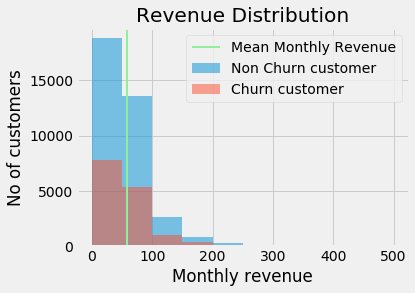

In [18]:
non_churn_df['MonthlyRevenue'].fillna(non_churn_df['MonthlyRevenue'].mean(),inplace=True)
churn_df['MonthlyRevenue'].fillna(churn_df['MonthlyRevenue'].mean(),inplace=True)
plt.hist(non_churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5,label='Churn customer')
mean_rev=df['MonthlyRevenue'].mean()
plt.axvline(mean_rev,label='Mean Monthly Revenue',color='#91ee9a',linewidth=2)
plt.ylabel("No of customers")
plt.xlabel("Monthly revenue")
plt.legend()
plt.tight_layout()
plt.title('Revenue Distribution')
plt.show()

#### Q3 are we loosing existing customer or new customer

Can we plot histogram based on thier service period how many customers are churn vs non churn

Logic for ansawering this 
1. fill missing values with mean. 
2. just like earlier question fill two dfs with thier individual mean. 
3. for better visualization of plot, superimpose on top of each other rather than showing two graphs individually.
4. Draw mean line to show where dataset mean is 

In [19]:
df['MonthsInService'].isnull().sum()

0

In [20]:
#Ahow data is distributed 
non_churn_df['MonthsInService'].describe()

count    36336.000000
mean        18.639641
std          9.979326
min          6.000000
25%         11.000000
50%         16.000000
75%         24.000000
max         60.000000
Name: MonthsInService, dtype: float64

In [21]:
churn_df['MonthsInService'].describe()

count    14711.000000
mean        19.044321
std          9.336919
min          6.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         61.000000
Name: MonthsInService, dtype: float64

Just based on description of this property, we can see both category has even description. 
mean,stad deviation, 1st,2nd,3rd 4th quartile all are nearly identical

Also without ploting we can predict its **right skew graph** as mean is 19 but max is 60 

In [22]:
non_churn_df['MonthsInService'].fillna(non_churn_df['MonthsInService'].mean(),inplace=True)
churn_df['MonthsInService'].fillna(churn_df['MonthsInService'].mean(),inplace=True)

mean_rev=df['MonthsInService'].mean()


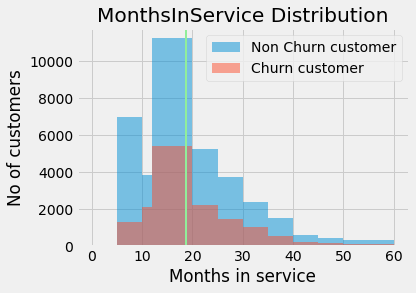

In [23]:
list_df= [non_churn_df['MonthsInService'],churn_df['MonthsInService']]
list_label=['Non Churn customer','Churn customer']
visual.hist(list_df,list_label,ylabel="No of customers",xlabel="Months in service",title="MonthsInService Distribution",
bins=[0,5,10,12,20,25,30,35,40,45,50,60],alpha=0.5,axvline=mean_rev,axvlie_label='Mean MonthsInService',axvlinewidth=2)

#### Q4 What about subscribers, can we use this to predict subscriber churn

Individual customer can have multiple subscribers, and they can close one of the subscriber. So can we use this data to predict subscriber churn ? 

Since dataset does not have any colunm with no of subscriber churn it should be devired from subtraction of unique subscrbers customer has and how many are active. 
Then use pie chart to show how many subscribers are active and how many are churn

In [24]:
df['ChurnSubs']=df['UniqueSubs']-df['ActiveSubs']

In [44]:
slices=[df['ActiveSubs'].sum(),df['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]


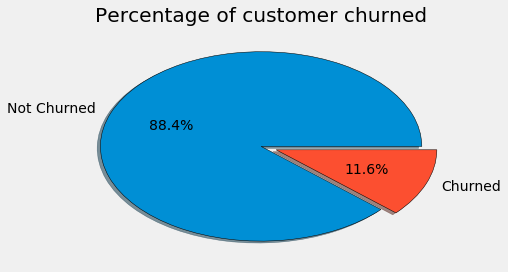

In [45]:
#plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
#plt.title("Percentage of subscribers churned")

#plt.tight_layout()
#plt.show()
visual.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',title="Percentage of subscribers churned")

In [46]:
print ("No of active subscribers {}".format(df['ActiveSubs'].sum()))

No of active subscribers 69135


In [47]:
print ("No of churn subscribers {}".format(df['ChurnSubs'].sum()))

No of churn subscribers 9077


#### Q5 - How effective is retention measures.

How effective are retention calls to call center? 
How many customer made retention calls ?
How many rentention calls actually retained the customer ?

First create new dataframe only to store customer that have made retention call 
Then calcualte how many of the new dataset are chrun customer and howmany are non churn 

Display result in pie chart


In [48]:
df['MadeCallToRetentionTeam'].isna().sum() 

0

We dont any customer data with missing retention call data 

In [49]:
retention_df=df[df['MadeCallToRetentionTeam']=='Yes']

In [50]:
print ("Total No of customer made call to CSR for retention purpose {}".format(retention_df.shape[0]))

Total No of customer made call to CSR for retention purpose 1745


In [51]:
print("No of customer churn after making call {}".format(retention_df[retention_df['Churn']=='Yes'].shape[0]))
print("No of customer retain after making call {}".format(retention_df[retention_df['Churn']=='No'].shape[0]))

No of customer churn after making call 786
No of customer retain after making call 959


In [52]:
print ("Sucess rate of rention call  {}".format(retention_df[retention_df['Churn']=='No'].shape[0]/retention_df.shape[0]))

Sucess rate of rention call  0.5495702005730659


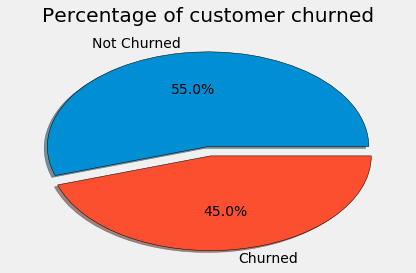

In [53]:
slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Not Churned','Churned']
explode=[0,0.1]
#plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
#plt.title("success rate of retention calls")
#plt.show()
visual.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',title="success rate of retention calls")

#### Q5 sucess rate of retention offers
Just like retntion calls , how much retention offers effective
how many customer that made retention calls accepted retention offer
how many customer with retnetion offer are actually retained 

Just like earlier create new dataframe for customer that accepted retention call offer

In [54]:
df['RetentionOffersAccepted'].isna().sum()

0

We dont have any customer with missing retention offer data

In [55]:
retention_offer_df=df[df['RetentionOffersAccepted']>0]

In [56]:
no_cust_with_ret_offer=retention_offer_df.shape[0]

In [57]:
print("Total customer accepted the retention offer {}".format(no_cust_with_ret_offer))
print("conversion rate customer making call for retention offer then accepting it {}".format(no_cust_with_ret_offer/retention_df.shape[0]))

Total customer accepted the retention offer 881
conversion rate customer making call for retention offer then accepting it 0.5048710601719197


In [58]:
print("No of customer churn after accepting retention offer {}".format(retention_offer_df[retention_offer_df['Churn']=='Yes'].shape[0]))

No of customer churn after accepting retention offer 362


In [59]:
print("No of customer retain after accepting retention offer {}".format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]))

No of customer retain after accepting retention offer 519


In [60]:
print("Success rate of  retention offer {}".format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]/no_cust_with_ret_offer))

Success rate of  retention offer 0.5891032917139614


Visualize the result using pie chart

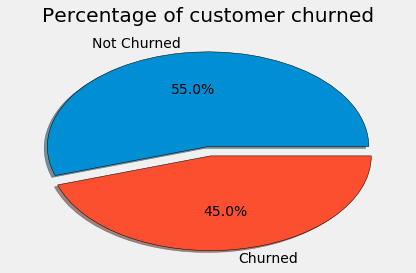

In [61]:
slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Not Churned','Churned']
explode=[0,0.1]
visual.pie(slices,labels=labels,explode=explode,title="success rate of retention offers",shadow=True,autopct='%1.1f%%')
#plt.title("success rate of retention offers")
#plt.show()

#### Are any specific income group customers are losing ? 

In [62]:
df['IncomeGroup'].isna().sum()

0

We dont have any missing data

1. Get all income groups 
2. Sort them in ascending order
3. draw side by side bar ghraph for better comparision of churn vs non churn customers

In [63]:
income_groups=df['IncomeGroup'].unique()

In [64]:
income_groups.sort()

In [65]:
income_groups#print all income groups 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
#to create bar ghraph we need list containing no of customer for each income group
churn_customer_per_group=[]
non_churn_customer_per_group=[]
for income in income_groups:
    no_cust=churn_df[churn_df['IncomeGroup'] == income].shape[0]
    normalize_no_cust=no_cust/churn_df.shape[0]
    churn_customer_per_group.append(normalize_no_cust)
    no_cust=non_churn_df[non_churn_df['IncomeGroup'] == income].shape[0]
    normalize_no_cust=no_cust/non_churn_df.shape[0]
    non_churn_customer_per_group.append(normalize_no_cust)

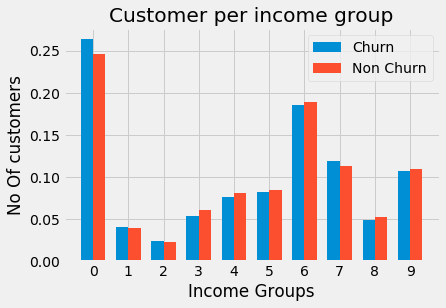

In [67]:
x =  income_groups # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_customer_per_group, width, label='Churn')
rects2 = ax.bar(x + width/2, non_churn_customer_per_group, width, label='Non Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of customers')
ax.set_title('Customer per income group')
ax.set_xticks(x)
ax.set_xticklabels(income_groups)
plt.xlabel("Income Groups")
ax.legend()


#### Is there any pattern in credit class of a customer 


In [68]:
df['CreditRating'].isna().sum()

0

we dont have missing data

Just like income group we need to draw bar chart for parallel comparison of churn vs non churn data

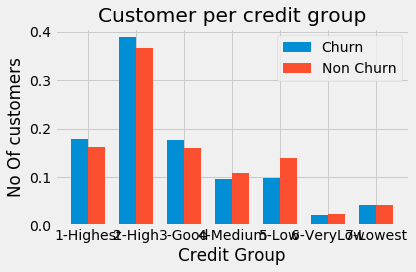

In [69]:
import numpy as np
credit_groups=df['CreditRating'].unique()
credit_groups.sort()
df['CreditRating'].fillna(df['CreditRating'].mode())
churn_customer_per_group=[]
non_churn_customer_per_group=[]
for credit in credit_groups:
    no_cust=churn_df[churn_df['CreditRating'] == credit].shape[0]
    normalize_no_cust=no_cust/churn_df.shape[0]
    churn_customer_per_group.append(normalize_no_cust)
    no_cust=non_churn_df[non_churn_df['CreditRating'] == credit].shape[0]
    normalize_no_cust=no_cust/non_churn_df.shape[0]
    non_churn_customer_per_group.append(normalize_no_cust)

x =  np.arange(len(credit_groups))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_customer_per_group, width, label='Churn')
rects2 = ax.bar(x + width/2, non_churn_customer_per_group, width, label='Non Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of customers')
ax.set_title('Customer per credit group')
ax.set_xticks(x)
ax.set_xticklabels(credit_groups)
plt.xlabel("Credit Group")
ax.legend()



fig.tight_layout()
plt.show()   

### Prepare data for machine learning
1. remove colunms which are irerelevent 
2. analize missing data

3. Convert categorical data using one hot encoding 

In [70]:
## Missing Data
bar_df=df.isna().sum()


In [71]:
bar_df[bar_df>0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

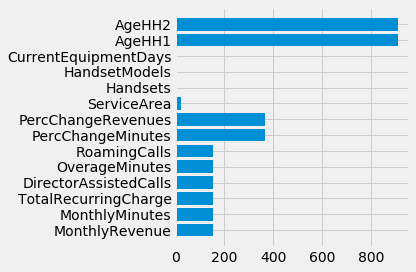

In [72]:
plt.barh(bar_df[bar_df>0].index,bar_df[bar_df>0].values)
plt.tight_layout()
plt.show()

We have very few clounms with missing data 

In [73]:
df[bar_df[bar_df>0].index].head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,SEAPOR503,2.0,2.0,361.0,62.0,0.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,PITHOM412,2.0,1.0,1504.0,40.0,42.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,MILMIL414,1.0,1.0,1812.0,26.0,26.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,PITHOM412,9.0,4.0,458.0,30.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,OKCTUL918,4.0,3.0,852.0,46.0,54.0


All colunms except  ServiceArea, Handsets, HandsetModels are quantitative in nature. we can use mean to impute values for them

Aso Handsets, HandsetModels, equipement days has only 1 row missing. so lets analyze if they all are in same row

In [74]:
 
df[df['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']]

,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


Out Guess was correct :) 

So better, lets impute them using **mode**,
**why mode not mean**
1. model and handest even put it number, in real sense they are categories.
eg we can not say handset2  is better than handset1 , or perform any mathematical operation
2. same is for Service code, its geogrpahic location
3. Mode indicates value which is appeared records. so there is high chances missing values also has same values as other records

**Why to Remove irrelvent data ?**
1. They dont contrribute info
2. IF we keep them, it may lead alorithm to find relationship with these colunms when they acually mean nothing
3. It will increase size of data, which will lead to higher memory and cpu computation 

1.1. customerid, it does not give any info to alorithm. it does not give contain any customer information. so better to remove it 



In [75]:
df.drop('CustomerID',axis=1, inplace=True)

In [76]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,ChurnSubs
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,0
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,0
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,6,No,0,10,No,4-Medium,Other,Other,No,0
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,9,No,1,10,No,1-Highest,Other,Professional,Yes,0


1.2. There has to be high correlation between calls made to retnetion team and retention call made.
in otherwords we should have data where customer didn't made retention call has no of retention call more than 0

In [77]:
df[(df['MadeCallToRetentionTeam']=='No') & (df['RetentionCalls']>0)].shape[0]


0

As expected there are no such customer. 
Since MadeCallToRetentionTeam only convey yes/no where as RetentionCalls convey much more info 

**so lets remove MadeCallToRetentionTeam**


In [78]:
df.drop('MadeCallToRetentionTeam',axis=1, inplace=True)

In [79]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,CreditRating,PrizmCode,Occupation,MaritalStatus,ChurnSubs
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,1-Highest,Suburban,Professional,No,1
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,4-Medium,Suburban,Professional,Yes,0
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,3-Good,Town,Crafts,Yes,0
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,4-Medium,Other,Other,No,0
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,1-Highest,Other,Professional,Yes,0


Imputing the data as discussed earlier

In [80]:
df['Handsets'].fillna(df['Handsets'].mode()[0],inplace=True)
df[df['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']]

,HandsetModels,Handsets,CurrentEquipmentDays


In [81]:
df['HandsetModels'].mode()[0]
df['HandsetModels'].fillna(df['HandsetModels'].mode()[0],inplace=True)
df[df['HandsetModels'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']]

,HandsetModels,Handsets,CurrentEquipmentDays


In [82]:
df['CurrentEquipmentDays'].fillna(df['CurrentEquipmentDays'].mode()[0],inplace=True)
df[df['CurrentEquipmentDays'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']]

,HandsetModels,Handsets,CurrentEquipmentDays


In [83]:
df['ServiceArea'].fillna(df['ServiceArea'].mode()[0],inplace=True)
df[df['ServiceArea'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,CreditRating,PrizmCode,Occupation,MaritalStatus,ChurnSubs


In [84]:
#Rest call colunms lets use mean to impute mean value 
df.fillna(df.mean(),inplace=True)


In [85]:
df.isna().sum() >0

Churn                        False
MonthlyRevenue               False
MonthlyMinutes               False
TotalRecurringCharge         False
DirectorAssistedCalls        False
OverageMinutes               False
RoamingCalls                 False
PercChangeMinutes            False
PercChangeRevenues           False
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                  False
Handsets                     False
HandsetModels                False
CurrentEquipmentDays

Converting categorical data into numerical data, using one hot encoding
1. Find all categorical data, categorical data will have dtype as object
2. if its binary, only 2 values,then no need to do one hot encoding, instead replace Yes with 1 and No with 0
3. for multiple values use one hot encoding

In [86]:

binary_cols=[]
multi_Value=[]
for col in df.columns :
    #print(col,df[col].dtype,df[col].dtype == 'object',df[col].unique().shape[0])
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
    #if(df[col].unique().shape[0]<2)

In [87]:
binary_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle']

In [88]:
multi_Value

['ServiceArea',
 'HandsetPrice',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

Suprize element is HandsetPrice ideally it should be numeric as it is price. lets analyze it

In [89]:
df['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

ok we have value as 'Unknown' which is NaN in other words. so replace it with mean

In [90]:
df[df['HandsetPrice']=='Unknown'].shape

(28982, 57)

we have 28982 almost 29000 missing rows, better remove this colunm as it is almost 50%

In [91]:
df[df['HandsetPrice']=='Unknown'].shape[0]/df.shape[0]

0.5677512880286795

In [92]:
df.drop('HandsetPrice',axis=1, inplace=True)

In [93]:
multi_Value.remove('HandsetPrice')

**we have identified dataset has value unknown indicating NaN**
lets see how many other col has this value

In [94]:
for col in binary_cols:
    print(col , df[col].unique())

Churn ['Yes' 'No']
ChildrenInHH ['No' 'Yes']
HandsetRefurbished ['No' 'Yes']
HandsetWebCapable ['Yes' 'No']
TruckOwner ['No' 'Yes']
RVOwner ['No' 'Yes']
Homeownership ['Known' 'Unknown']
BuysViaMailOrder ['Yes' 'No']
RespondsToMailOffers ['Yes' 'No']
OptOutMailings ['No' 'Yes']
NonUSTravel ['No' 'Yes']
OwnsComputer ['Yes' 'No']
HasCreditCard ['Yes' 'No']
NewCellphoneUser ['No' 'Yes']
NotNewCellphoneUser ['No' 'Yes']
OwnsMotorcycle ['No' 'Yes']


Homeownership is another lets analyze it same as HandsetPRcie


In [95]:
df[df['Homeownership']=='Unknown'].shape[0]/df.shape[0]

0.33420181401453564

In [96]:
# again 34% missing value so lets remove this col
df.drop('Homeownership',axis=1, inplace=True)

In [97]:
binary_cols.remove('Homeownership')

In [98]:

for col in multi_Value:
    print(col , 'Unknown' in df[col].unique())

ServiceArea False
CreditRating False
PrizmCode False
Occupation False
MaritalStatus True


In [99]:
df[df['MaritalStatus']=='Unknown'].shape[0]/df.shape[0]

0.38591885909064194

In [100]:
# again 34% missing value so lets remove this col
df.drop('MaritalStatus',axis=1, inplace=True)
multi_Value.remove('MaritalStatus')

Repalcing binary values 

In [101]:
for col in binary_cols:
    df[col].replace('Yes',1,inplace=True)
    df[col].replace('No',0,inplace=True)
    print(col, df[col].unique())

Churn [1 0]
ChildrenInHH [0 1]
HandsetRefurbished [0 1]
HandsetWebCapable [1 0]
TruckOwner [0 1]
RVOwner [0 1]
BuysViaMailOrder [1 0]
RespondsToMailOffers [1 0]
OptOutMailings [0 1]
NonUSTravel [0 1]
OwnsComputer [1 0]
HasCreditCard [1 0]
NewCellphoneUser [0 1]
NotNewCellphoneUser [0 1]
OwnsMotorcycle [0 1]


one hot encoding for multi value colunms

Since service Area has too many unique value, one hot will produce sparce matrix , which will consume too much memory , so lets drop it


In [102]:
df.drop('ServiceArea',axis=1, inplace=True)

In [103]:
multi_Value.remove('ServiceArea')

In [104]:
dfDummies = pd.get_dummies(df[multi_Value], prefix = 'category')


In [105]:
dfDummies.shape

(51047, 19)

In [106]:
df.shape

(51047, 53)

remove orignial colunms and append newly createed colunms


In [107]:
removed_multi_df=df.drop(multi_Value,axis=1)

In [108]:
multi_Value

['CreditRating', 'PrizmCode', 'Occupation']

In [109]:
removed_multi_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,ChurnSubs
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,1,0,0,0,0,4,0,0,1
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1,0,0,1,0,0,5,0,0,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,0,0,1,0,0,6,0,0,0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,1,0,0,1,0,0,6,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,0,0,0,1,0,9,0,1,0


In [110]:
clean_dataframe=pd.concat([removed_multi_df, dfDummies], axis=1)

In [111]:
clean_dataframe.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,category_Suburban,category_Town,category_Clerical,category_Crafts,category_Homemaker,category_Other,category_Professional,category_Retired,category_Self,category_Student
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,0,0,0,0,0,1,0,0,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1,0,0,0,0,0,1,0,0,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,0,0,1,0,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X=clean_dataframe.drop('Churn',axis=1)
names = X.columns

scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
scaled_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,category_Suburban,category_Town,category_Clerical,category_Crafts,category_Homemaker,category_Other,category_Professional,category_Retired,category_Self,category_Student
0,-0.783875,-0.579624,-1.042748,-0.289975,-0.415056,-0.126106,-0.566877,-0.451613,-0.587303,-0.309284,...,1.454924,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717
1,-0.941620,-0.974668,-1.252725,-0.402329,-0.415056,-0.126106,0.029417,0.030229,-0.631532,-0.373230,...,1.454924,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717
2,-0.468835,-0.978448,-0.370823,-0.402329,-0.415056,-0.126106,0.037212,0.030229,-0.664703,-0.373230,...,-0.687321,2.392999,-0.140342,5.710137,-0.055544,-1.675302,-0.454987,-0.1207,-0.132367,-0.086717
3,0.527590,1.486321,1.183005,0.154945,-0.415056,-0.126106,0.656889,0.235646,5.085049,0.330172,...,-0.687321,-0.417886,-0.140342,-0.175127,-0.055544,0.596907,-0.454987,-0.1207,-0.132367,-0.086717
4,-0.938244,-0.993569,-1.252725,-0.402329,-0.415056,-0.126106,0.045006,0.025157,-0.664703,-0.373230,...,-0.687321,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717


### Modeling
Since this is categorical data, as we will predict if customer will churn or not. lets use simple decision tree alorighm to predict customer churn

In [114]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [115]:
y=clean_dataframe['Churn']
X=scaled_df

In [116]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [117]:
X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,category_Suburban,category_Town,category_Clerical,category_Crafts,category_Homemaker,category_Other,category_Professional,category_Retired,category_Self,category_Student
0,-0.783875,-0.579624,-1.042748,-0.289975,-0.415056,-0.126106,-0.566877,-0.451613,-0.587303,-0.309284,...,1.454924,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717
1,-0.941620,-0.974668,-1.252725,-0.402329,-0.415056,-0.126106,0.029417,0.030229,-0.631532,-0.373230,...,1.454924,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717
2,-0.468835,-0.978448,-0.370823,-0.402329,-0.415056,-0.126106,0.037212,0.030229,-0.664703,-0.373230,...,-0.687321,2.392999,-0.140342,5.710137,-0.055544,-1.675302,-0.454987,-0.1207,-0.132367,-0.086717
3,0.527590,1.486321,1.183005,0.154945,-0.415056,-0.126106,0.656889,0.235646,5.085049,0.330172,...,-0.687321,-0.417886,-0.140342,-0.175127,-0.055544,0.596907,-0.454987,-0.1207,-0.132367,-0.086717
4,-0.938244,-0.993569,-1.252725,-0.402329,-0.415056,-0.126106,0.045006,0.025157,-0.664703,-0.373230,...,-0.687321,-0.417886,-0.140342,-0.175127,-0.055544,-1.675302,2.197865,-0.1207,-0.132367,-0.086717


In [118]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#precision_recall_fscore_support(y_true, y_pred, average='macro')

In [119]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [120]:
y_pred=clf.predict(X_test)

In [121]:
print("f1 score : ", f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))    

f1 score :  0.5495440292581709
precision :  0.5489210856541377
recall :  0.5505446671170666


In [122]:
confusion_matrix(y_test, y_pred)

array([[5322, 1986],
       [1820, 1082]])

In [123]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 101)
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("f1 score : ", f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))  

f1 score :  0.5033625174988364
precision :  0.6343453667130019
recall :  0.5345205277148765


Implementing grid search to improve accuracy

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import fbeta_score

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state = 101,base_estimator=DecisionTreeClassifier())


# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[25,50,120], 
              'learning_rate':[0.1, 0.5, 1.0],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anacond

In [125]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_pred, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.7200
F-score on testing data: 0.2945

Optimized Model
------
Final accuracy score on the testing data: 0.7072
Final F-score on the testing data: 0.3781


### Conclusion
In this Notebook,
1. I did exploratory data analysis
2. Did data preprocessing
3. Applied machine learning
4. Applied gride search/ data pipeline to improve the results